## Project 9 - Partial Correlations and Directed Acyclic Graphs

### Lets start by generating some artificial data

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [24.25553142137517,
  24.206903339834653,
  23.845093965719542,
  23.19286096304768,
  21.77582447428665,
  27.408505878248288,
  24.61414499404252,
  26.108688284069082,
  26.505301630936483,
  23.079908368987525,
  25.24691172034273,
  22.447499583697983,
  23.82440174732916,
  29.39211620807434,
  27.580148056614863,
  24.078989127029768,
  19.479896184333384,
  27.313450452571836,
  22.257818995770435,
  31.183269815088646,
  24.57457216118882,
  30.123284344942128,
  28.30150593253969,
  25.979179475978505,
  25.393249836057095,
  23.42581917204936,
  23.453522373576924,
  25.45330591264619,
  25.505755397052948,
  23.972131132276647,
  26.78892650132793,
  25.67285272318807,
  24.188957002515977,
  23.89768767572898,
  23.276243502575735,
  26.94393390906978,
  21.076058620918804,
  22.995669271085863,
  22.64973706278944,
  23.989638530621516,
  23.018562194254567,
  20.53737624869913,
  26.270432651723286,
  26.157951587255496,
  27.191938374226655,
  28.302229765540776,


In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,24.255531,41.259642,121.499120,-44.626724,313.409395
1,24.206903,50.979924,151.076820,-55.932409,390.264821
2,23.845094,54.313155,169.712581,-50.598529,397.530703
3,23.192861,51.959495,159.428556,-55.553642,391.236058
4,21.775824,53.565308,161.927965,-61.976832,412.534392
...,...,...,...,...,...
99995,23.001793,58.200400,171.778615,-62.789889,433.679159
99996,26.506833,49.909249,157.921331,-54.498518,401.994834
99997,25.779214,49.658343,148.717252,-49.480388,378.902769
99998,30.342403,49.813044,146.580552,-48.271573,370.927505


<AxesSubplot:xlabel='X', ylabel='Z'>

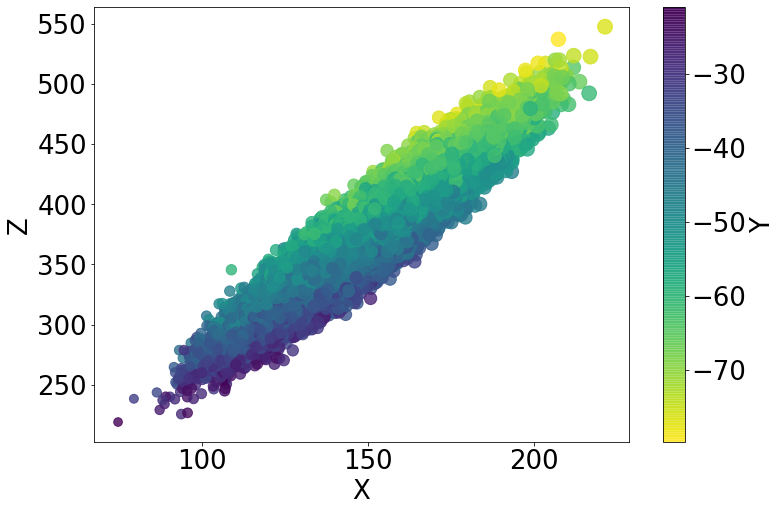

In [3]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.003616,-0.003534,-0.000643,0.137810
Q,-0.003616,1.000000,0.948899,-0.709213,0.915141
X,-0.003534,0.948899,1.000000,-0.672104,0.934352
Y,-0.000643,-0.709213,-0.672104,1.000000,-0.847422
Z,0.137810,0.915141,0.934352,-0.847422,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:24:48   Log-Likelihood:            -1.9908e+05
No. Observations:              100000   AIC:                         3.982e+05
Df Residuals:                   99995   BIC:                         3.982e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q             -0.0024      0.004     -0.644      0.5

In [6]:
residuals

,P,Q,X,Y,Z
0,1.267347,-0.481121,2.356912,-3.306593,-6.596491
1,-1.234114,0.137864,-2.096150,0.340959,3.311964
2,0.912010,-1.112523,4.813060,-1.631983,-5.915846
3,0.458132,-1.122268,3.616224,-2.893475,-5.449298
4,-2.128660,-0.792662,-0.546860,-0.863269,2.024874
...,...,...,...,...,...
99995,-2.083478,1.085200,-2.859639,0.819537,4.323176
99996,-0.026542,-2.662129,1.097729,0.317744,3.084315
99997,-0.944465,0.055266,-2.534004,2.156584,5.312232
99998,4.208502,0.911830,1.959139,-2.132375,-6.132138


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,-0.00,-0.59,0.63,0.71
Q,-0.00,1.00,0.50,-0.14,0.00
X,-0.59,0.50,1.00,0.75,0.83
Y,0.63,-0.14,0.75,1.00,-0.90
Z,0.71,0.00,0.83,-0.90,1.00


In [8]:
!pip install pingouin --user

In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,-0.00,-0.59,0.63,0.71
Q,-0.00,1.00,0.50,-0.14,0.00
X,-0.59,0.50,1.00,0.75,0.83
Y,0.63,-0.14,0.75,1.00,-0.90
Z,0.71,0.00,0.83,-0.90,1.00


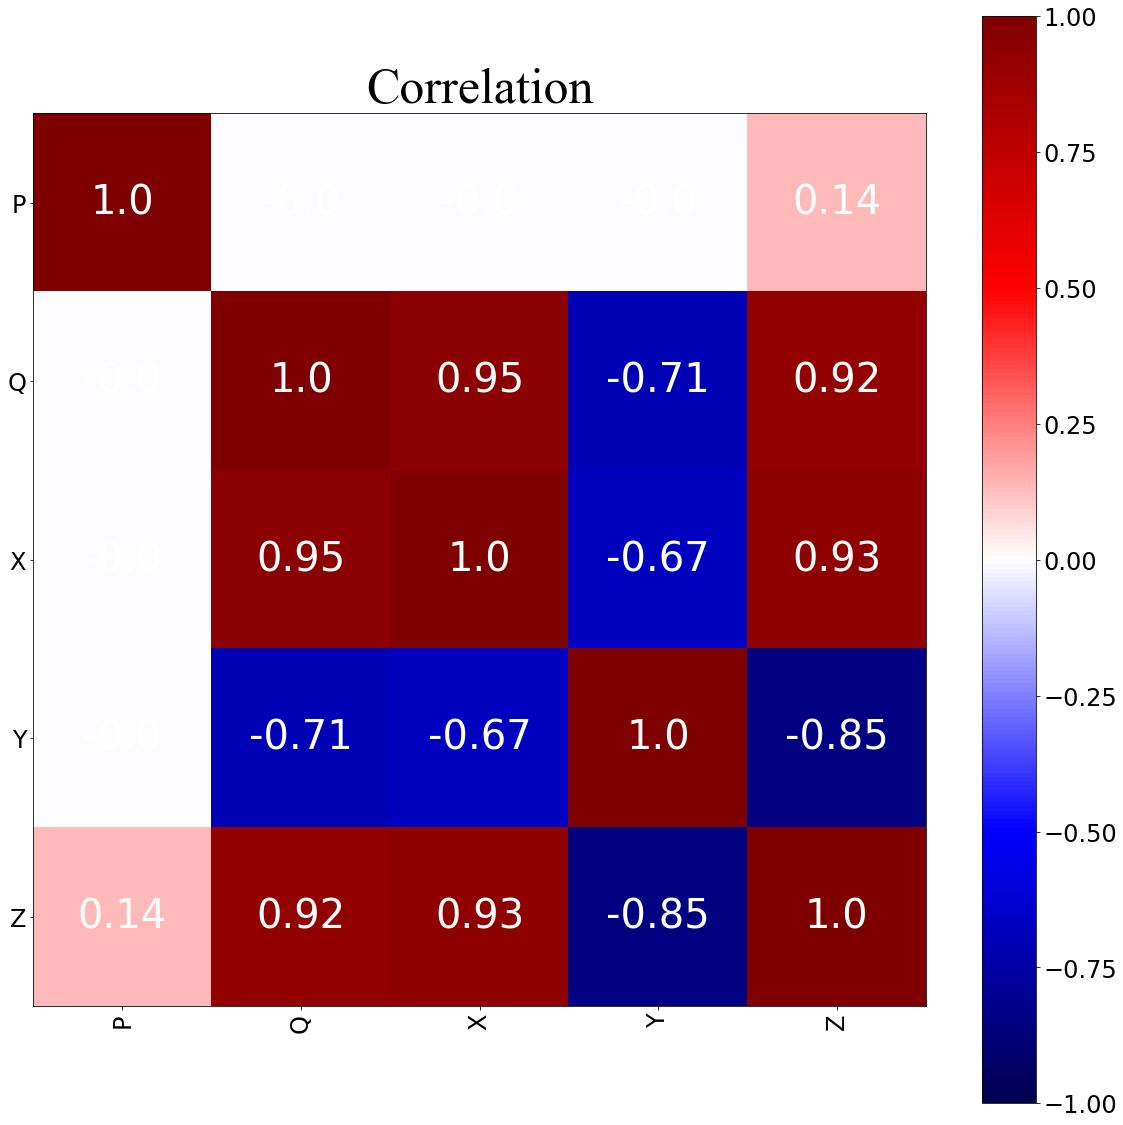

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,)

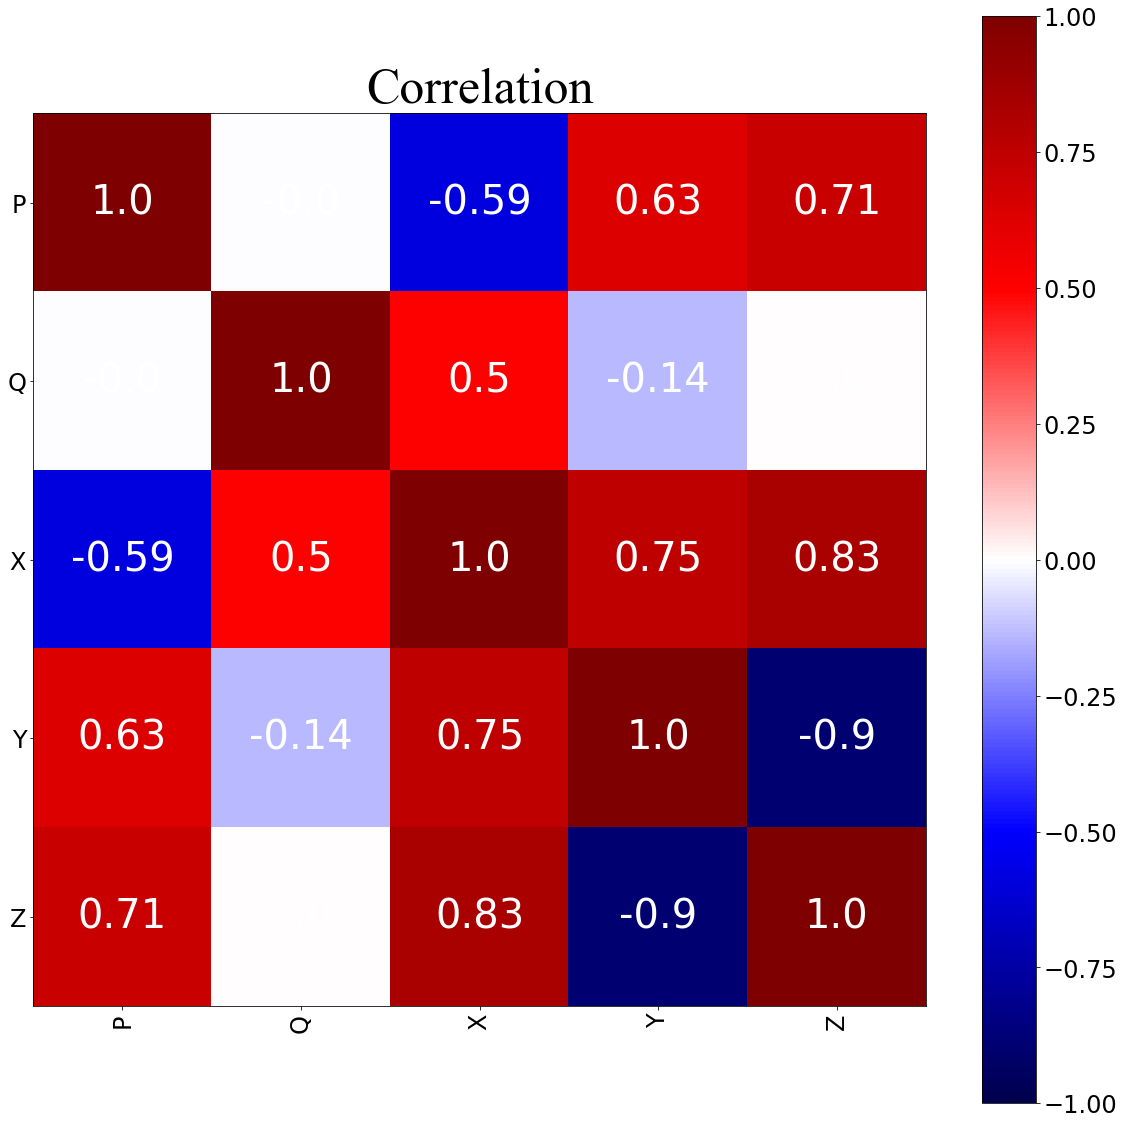

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None)

In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.4149
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                       0.519
Time:                        22:24:54   Log-Likelihood:                     -1.9908e+05
No. Observations:              100000   AIC:                                  3.982e+05
Df Residuals:                   99999   BIC:                                  3.982e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.399
Model:                            OLS   Adj. R-squared (uncentered):              0.399
Method:                 Least Squares   F-statistic:                          6.640e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:24:54   Log-Likelihood:                     -1.9652e+05
No. Observations:              100000   AIC:                                  3.930e+05
Df Residuals:                   99999   BIC:                                  3.930e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.52,0.0,0.0,0.00
Q,0.52,NaN,0.0,0.0,0.83
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.83,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [15]:
!pip install decorator==5.0.9 --user

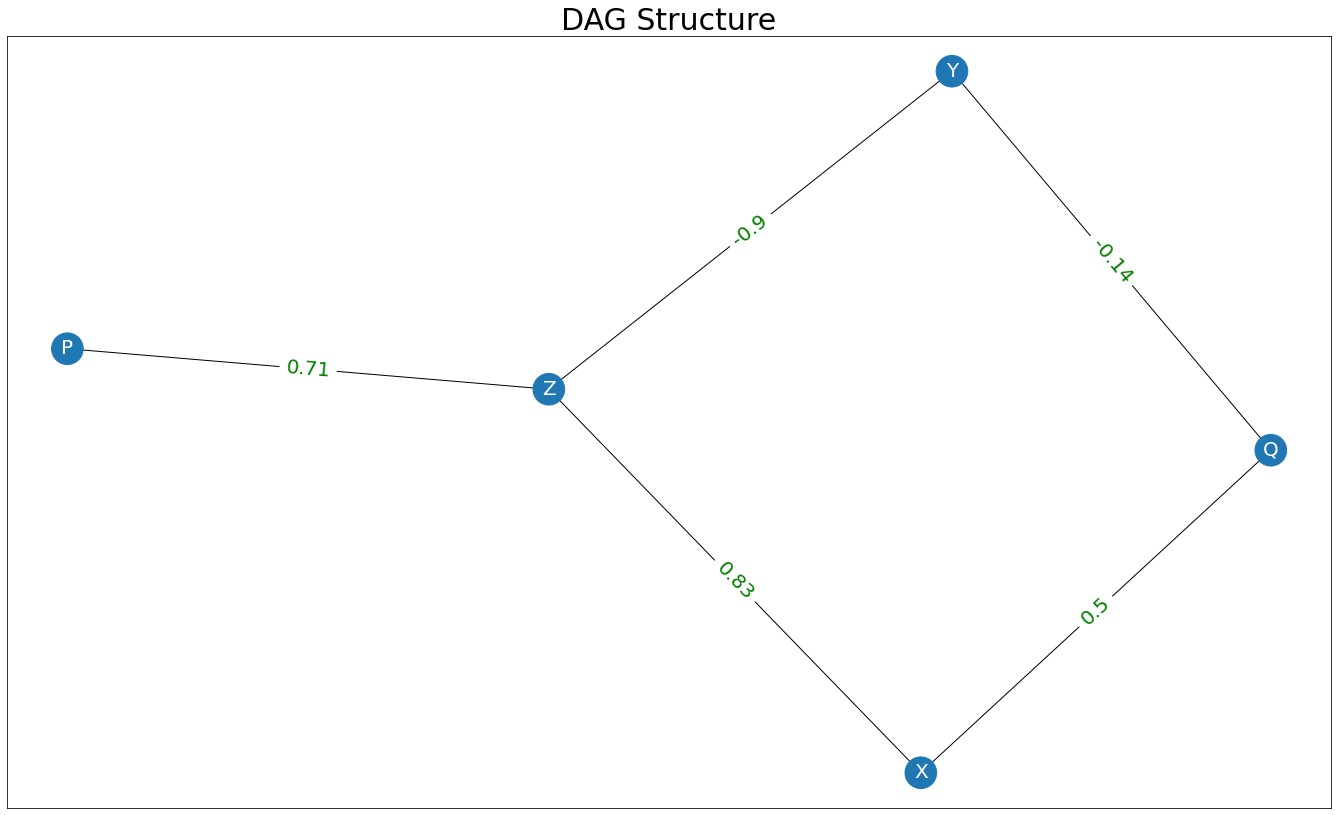

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [17]:
!pip install pgmpy

In [18]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel",
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('X', 'Z'), ('P', 'Z'), ('Y', 'Z'), ('Q', 'X'), ('Q', 'Y')])

keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
('Q', 'X') []
('Q', 'Y') []


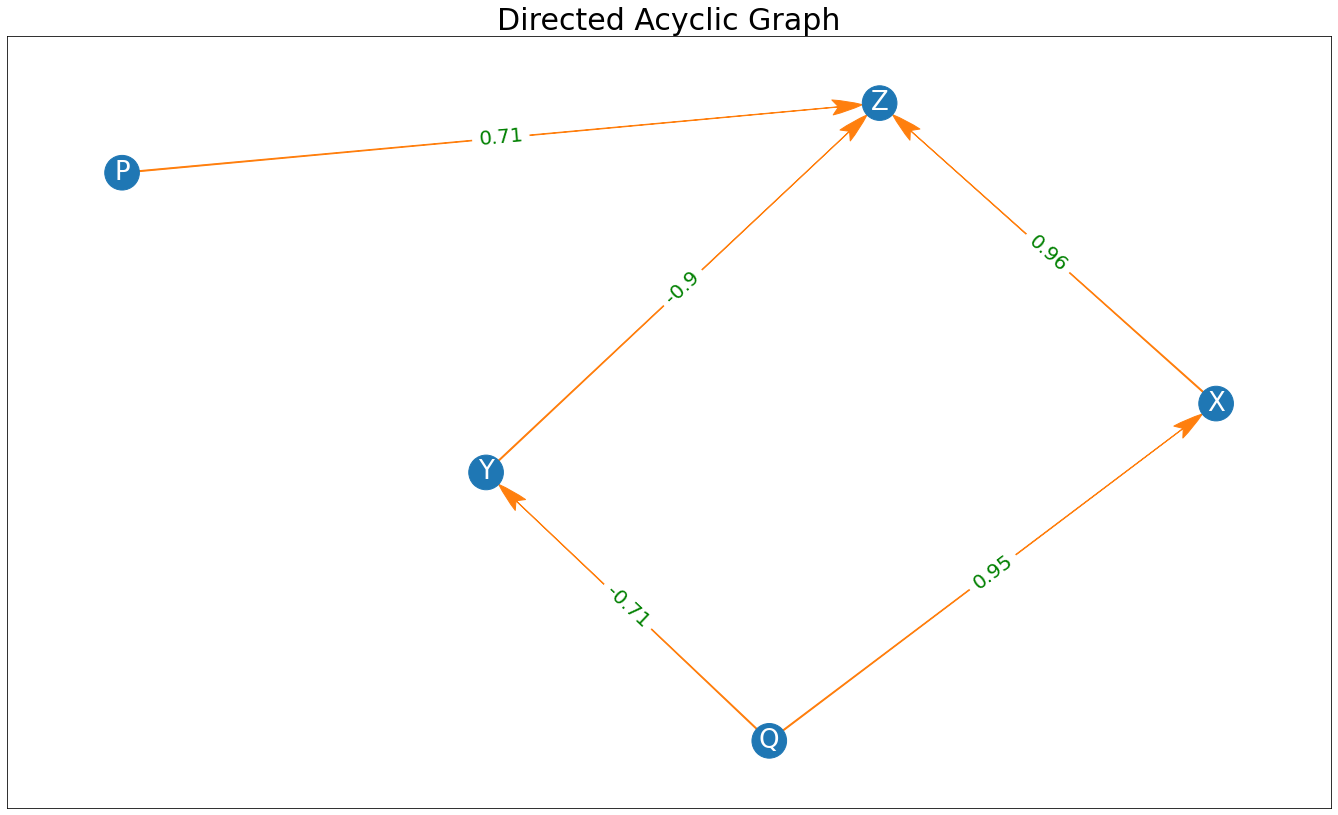

In [29]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")

End of in class notes for project 9